## Importing the libraries

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [159]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ1_FFT20Pkt/test", 4, 12)
X_train = training_set.iloc[:, [3,4]].values
y_train = training_set.iloc[:, [1,2]].values
test_set = get_combined_dataset("training_data/Typ2_FFT20Pkt/training", 1, 3)
X_test = test_set.iloc[:, [3,4]].values
y_test = test_set.iloc[:, [1,2]].values

## Training the Random Forest Regression model

In [160]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

## Predicting the Test set results on independent test set

In [161]:
y_pred = regressor.predict(X_test)

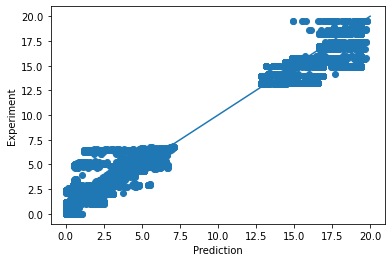

In [162]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("Experiment")
plt.plot([0, 20], [0, 20])
plt.show()

In [163]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5104096539370381

In [164]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

1.4241389728363292


In [165]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

97.85253718692377


In [166]:
np.savetxt("rfr_test_train1test2_2output.txt", y_test)

In [167]:
np.savetxt("rfr_pred_train1test2_2output.txt", y_pred)